In [8]:
#!pip install altair -U
import altair as alt
import pandas as pd
import altair as alt
from vega_datasets import data
alt.__version__

'3.0.1'

In [9]:
def workshop_theme(*args, **kwargs):
    return {
            "width": 400,
            "height": 200,
            "config": {
              "title": {
                  'fontSize': 20
              },
              "numberFormat": ".0f",
              "style": {
                "bar": {
                  "size": 5
                },
                "guide-title": {
                  "fontSize": 25
                },
                "guide-label": {
                  "fontSize": 20
                },
              },
              "scale": {
                "bandPaddingInner": 0.5,
                "bandPaddingOuter": 0.5
              },
              "legend": {
                "symbolSize": 100,
                "titleFontSize": 20,
                "labelFontSize": 18
              },
              "axis": {
                "titleFontSize": 20,
                "labelFontSize": 18
              }
            }
          }

alt.themes.register('workshop_theme', workshop_theme)
alt.themes.enable('workshop_theme');
#themes.enable('default')

# Goals of the workshop

1. introduce you to some of the popular viz libraries
2. teach you how to think about data viz using the "grammer of graphics"




# Agenda
- 9:30-10:30
 - who am I?
 - the Jupyter Notebook environment
 - introduction to the data visualization ecosystem
- 10:30-10:45
 - coffe break
- 10:45-12
 - exploring data together on the fly
 - using the Grammar of Graphics scaffolding as a guide
- 12-12:45
 - lunch
- 12:45-1:15
 - playing a web-based game to test your knowledge
 - matching grammar, code, and charts

<br>
...after 1:15
- I can stay around to discuss whatever you like

 


# Today's data visualization ecosystem

- not anywhere close to a complete list



## Code-based libraries

<a href="https://matplotlib.org/gallery/index.html"><img src="https://matplotlib.org/_static/logo2.png" width="350" height="85" /></a>

- can make any visualization you can imagine
- 800 lb gorilla 
- powerful but verbose
- no interactions

<a href="https://plot.ly/python/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Plotly-logo-01-square.png/220px-Plotly-logo-01-square.png" width="195" /></a>

- great for interactive charts
- a bit verbose
- works with multiple languages
- images are rendered on a server
- licensing options

<a href="https://plot.ly/products/dash/"><img src="https://cdn.rawgit.com/plotly/dash-docs/b1178b4e/images/dash-logo-stripe.svg" width="400" /></a>
- web based interactive "dashboards"
- based on plotly


<a href="https://www.r-graph-gallery.com/portfolio/ggplot2-package/"><img src="http://hexb.in/hexagons/ggplot2.png" width="145" /></a>
- also implemented in Python (ggplot, plotnine)
- very mature library


<a href="https://shiny.rstudio.com/gallery/genome-browser.html"><img src="https://ih0.redbubble.net/image.543360174.2115/sticker,375x360-bg,ffffff.png" width="190" /></a>
- web based interactive "dashboards"
- based on ggplot2

<br>


<a href="https://bokeh.pydata.org/en/latest/docs/gallery.html#"><img src="https://www.fullstackpython.com/img/logos/bokeh.jpg" width="250" /></a>

- similar to plotly
- can incorporate widgets (slider bars, dropdown menues, etc)
- streaming data is possible
- verbose for interactions


<a href="https://d3js.org/"><img src="https://bl.ocks.org/mbostock/raw/e787e283b8cf9d5a8f8a/97458aee5b3a0e4155e7fb989ac1e7b622d1dfa6/d3.svg" width="170" /></a>

- basically more powerful than anything ...


## Vega
<a href="https://vega.github.io/vega/"><img src="https://flourish.studio/images/blog/vega-lite.png" width="500" height/></a>
- built on D3, still requires a lot of code 

## Vega-Lite
<a href="https://vega.github.io/vega-lite/"><img src="https://user-images.githubusercontent.com/589034/43657136-ad9cdea6-9709-11e8-91c5-fe8dc0f71065.png" width="170" /></a>

- built on Vega
- getting closer to what we would typically need

## Altair
<a href="https://altair-viz.github.io/gallery/index.html"><img src="https://altair-viz.github.io/_static/altair-logo-light.png" width="170" /></a>

- built on Vega-Lite
- declarative coding style using a "grammar of graphics"
- code for static and interactive charts is consise
- free to use
- a new library that is still being documented
- not considered as "powerful" as Matplotlib in terms of the kinds of charts you can make
-  with Altair you specify *what* you want, and you let the program decide automatically *how* to make it happen

<br>
<hr> 


## Graphical based visualization programs

- no code required (sort of)
- harder to automate
- can be expensive 

<br>

<a href="http://vega.github.io/voyager/"><img src="https://vega.github.io/voyager/static/media/logo.9de9d031.png" width="400" /></a>

<a href="https://www.tableau.com/solutions/gallery"><img src="https://i.pcmag.com/imagery/reviews/03ET1vJXgWnmfrLZ7g542br-5.fit_scale.size_1028x578.v_1569475368.jpg" width="300" /></a>


<a href="https://powerbi.microsoft.com/en-us/what-is-power-bi/"><img src="https://senturus.com/wp-content/uploads/2016/05/Power-BI.jpg" width="300" /></a>



# How to choose the right library for you?

- let's rate each library on:
  - flexibility
  - expressiveness
  - interactivity

- then we can make a chart about our charting libraries!

### making the data

In [10]:
df=pd.DataFrame({'library': ['matplotlib', 'plotly', 'ggplot', 'bokeh', 'd3', 'vega', 'vegalite', 'altair'], 
                'expressiveness': [.2 , .4, .9, .6, 0, .1, .8, 1], 
                'flexibility': [.9 , .7, .7, .7, 1, .8, .5, .5],
                'interactivity': [0, .7, 0, .7, 1., .9, .8, .8]})

df=df.melt(['library'], var_name='criteria', value_name='rating')

df.head()

,library,criteria,rating
0,matplotlib,expressiveness,0.2
1,plotly,expressiveness,0.4
2,ggplot,expressiveness,0.9
3,bokeh,expressiveness,0.6
4,d3,expressiveness,0.0


### make a chart 

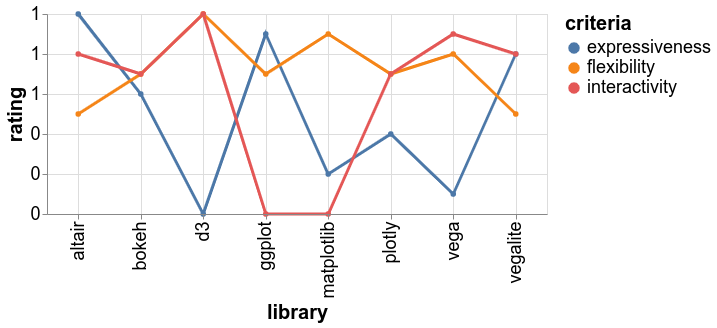

In [11]:
alt.Chart(df).mark_line(point=True, strokeWidth=3).encode(
    x=alt.X('library', axis=alt.Axis(grid=True)),
    y='rating',
    color='criteria',
    tooltip=['library', 'rating', 'criteria']
).properties(width=500)

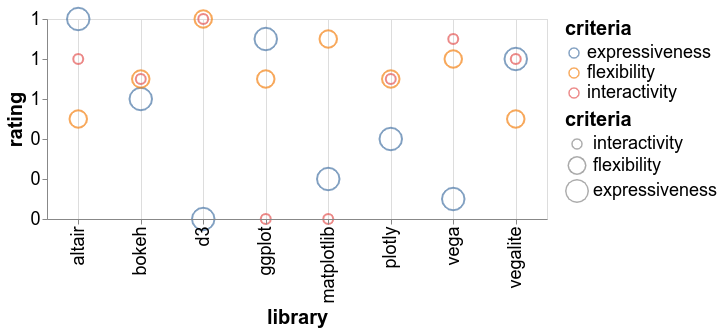

In [12]:
alt.Chart(df).mark_point().encode(
    x=alt.X('library', axis=alt.Axis(grid=True)),
    y=alt.Y('rating', axis=alt.Axis(grid=False)),
    color='criteria',
    size=alt.Size('criteria', scale=alt.Scale(range=[100,500],domain=['interactivity', 'flexibility','expressiveness'])),
    tooltip=['library', 'rating', 'criteria']
).properties(width=500)

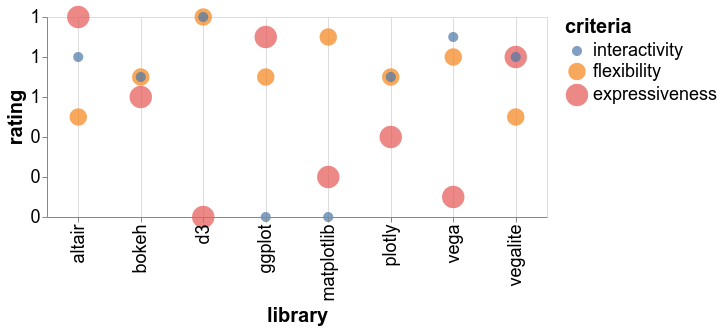

In [13]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('library', axis=alt.Axis(grid=True)),
    y=alt.Y('rating', axis=alt.Axis(grid=False)),
    color=alt.Color('criteria', scale=alt.Scale(domain=['interactivity', 'flexibility','expressiveness'])),
    size=alt.Size('criteria', scale=alt.Scale(range=[100,500],domain=['interactivity', 'flexibility','expressiveness'])),
    tooltip=['library', 'rating', 'criteria']
).properties(width=500)

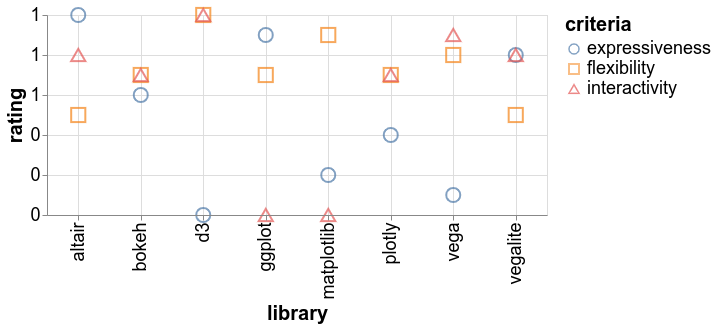

In [14]:
alt.Chart(df).mark_point(size=200).encode(
    x=alt.X('library', axis=alt.Axis(grid=True)),
    y='rating',
    color='criteria',
    shape='criteria',
    tooltip=['library', 'rating', 'criteria']
).properties(width=500)

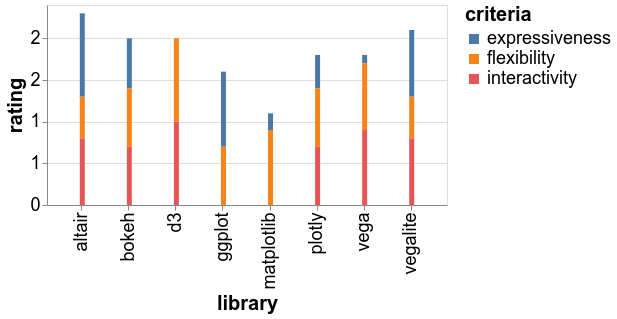

In [15]:
alt.Chart(df).mark_bar().encode(
    x='library',
    y='rating',
    color='criteria',
)

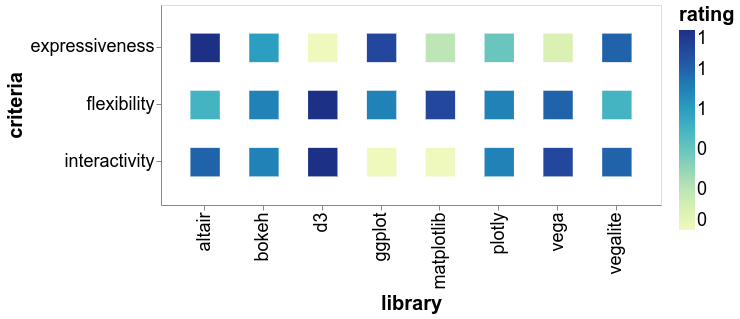

In [16]:
alt.Chart(df).mark_rect().encode(
    x='library',
    y='criteria',
    color='rating',
    tooltip=['library', 'rating', 'criteria']
).properties(width=500)

# Important factors to consider when choosing a viz library
- do you need reproducibility and/or automation?
- do you need interactivity?  ([see here](https://medium.com/@dominikus/the-end-of-interactive-visualizations-52c585dcafcb))
- sharing data?
- are you exploring or designing for final publication?
- do you need GIS or 3D charts?
- user authentication
- the job market
- integration with data wrangling tools